# 逻辑回归 LogisticRegression 
回归问题：根据一个或者多个特征，预测一个连续的目标

**逻辑回归**：分类模型（二分or多分类）

二分类问题：将输入映射到0和1的函数

## 逻辑回归的核心思想:
1. 先对输入特征做线性组合：
$$
z = w^T x + b
$$
2. 通过逻辑函数（Sigmoid函数）将结果压缩到(0,1)区间： 
$$
LogisticRegression(x)=Sigmoid(z) = \frac{1}{1+e^{-z}}
$$

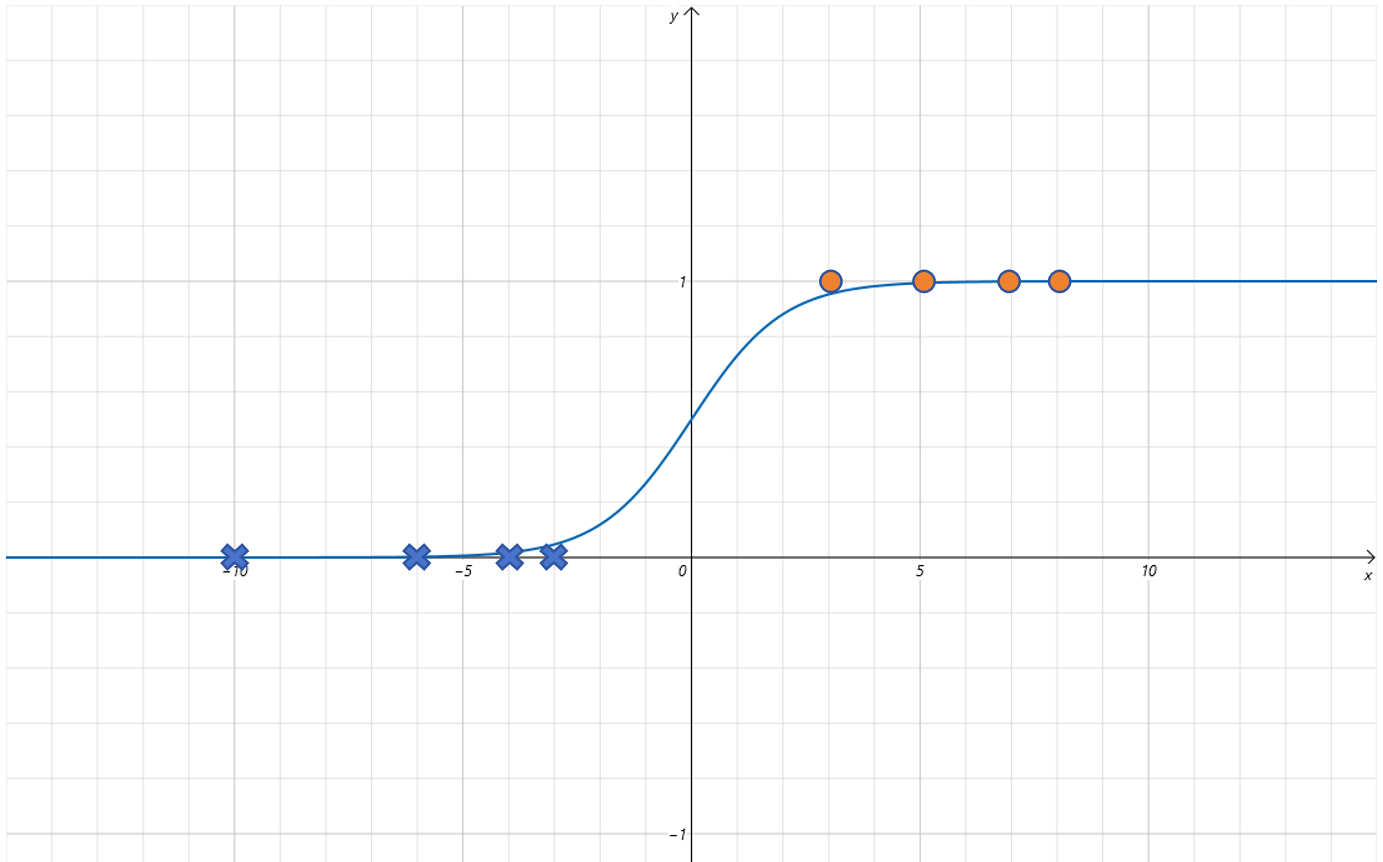

## 对一元逻辑回归的理解
我们对Sigmoid函数的输入x，增加了w和b参数。实际上就是对x应用了一个线性回归，然后再进行Sigmoid变化。

所以我们可以理解为**一元逻辑回归就是在线性回归的基础上，增加了一个Sigmoid函数。**

在深度学习里，输入首先经过一个线性变化，然后经过一个非线性的函数(比如这里的Sigmoid函数)。
这个非线性的函数我们就叫做激活函数。

激活函数的作用就是在线性函数的基础上增加了非线性。

Sigmoid函数是我们学习的第一个激活函数。

它在输入小于0的时候，对输出产生**抑制**作用，输出接近于0;

当输入大于0时，产生**激活**作用，输出快速接近1。

## 逻辑回归的损失函数

**构建**一个模型，就是定义一个假设函数。也就是你认为输入和输出符合的关系。

**训练**一个模型，就需要定义损失函数，然后利用梯度下降算法，让损失越来越小。最终得到让损失最小的模型参数。

**预测**就是利用训练好的模型参数和新采集的Feature，带入假设函数，预测一个输出。


### 利用均方误差MSE作为loss函数计算

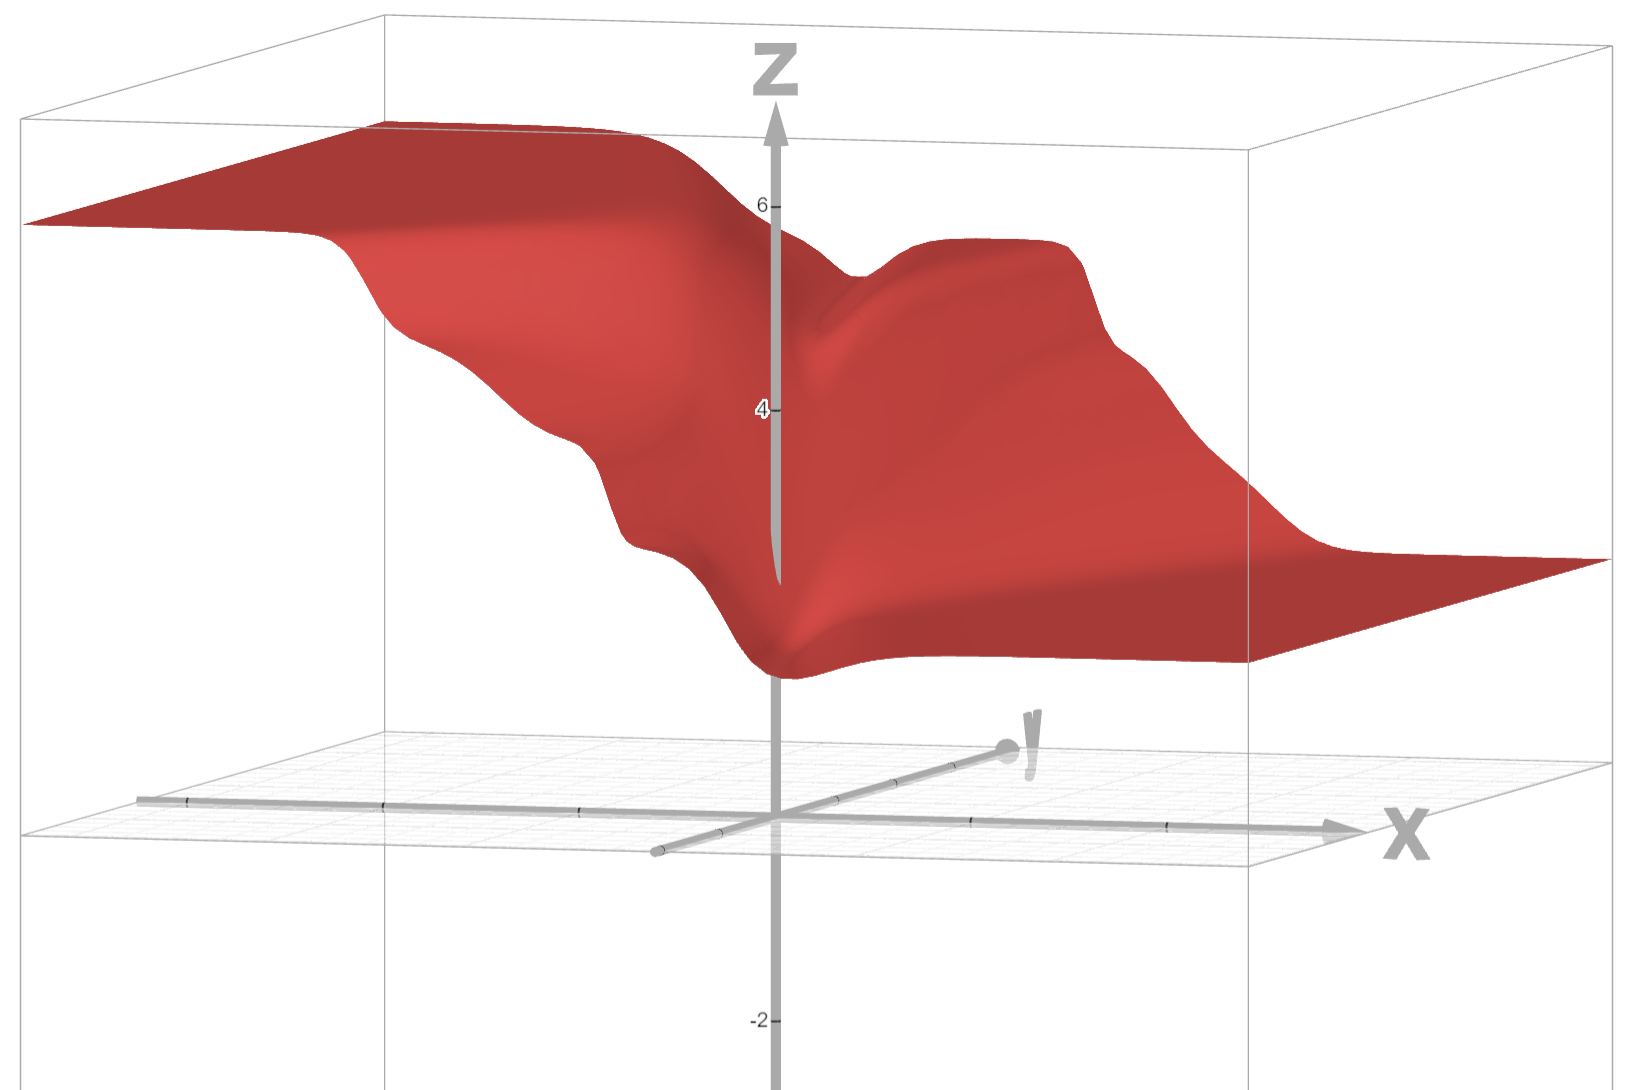

观察发现，MSE为非凸函数，不平滑，有很多局部最小值，训练起来非常不稳定。

#### 为什么非凸函数训练起来不稳定？

训练机器学习模型（尤其是深度神经网络）时，我们的目标是最小化损失函数

如果损失函数是凸的：

无论从哪里开始，梯度下降都能收敛到唯一的全局最优解。训练稳定，结果可预测。

**在凸函数的曲面上，球一定会滚到唯一的最低点（全局最小值）**

如果损失函数是非凸的：

多个局部最小值：优化过程可能被困在某个局部最小值，而不是最优解。

**在非凸函数的曲面上，球可能滚到很多不同的坑里（局部最小值），而且有的坑还不是最低的。**

鞍点问题：在鞍点处，梯度接近0，但它并不是最小值，训练可能“卡住”。

路径依赖性强：不同的随机初始化、学习率或数据顺序，都会导致优化器走向完全不同的结果。

震荡/不稳定：因为曲面复杂，梯度方向可能变化很快，导致训练发散或收敛很慢。

### 交叉熵Loss函数 (概率论+极大似然估计)
二分类交叉熵损失函数     BCELoss(Binary Cross Entropy Loss)

$y$表示Label值，用$\hat{y}$表示预测值

y = 1时：   $BCELoss=−log( \hat{y})$

y = 0时：   $BCELoss=−log( 1-\hat{y})$

BCELoss需要分情况来写，比较麻烦，我们将它们统一到一个式子里：
$$
BCELoss(y,\hat{y}) = -[ylog\hat{y} + (1-y)log(1-\hat{y})]
$$

可以看到它的函数图像非常平滑，非常适合用梯度下降来优化:
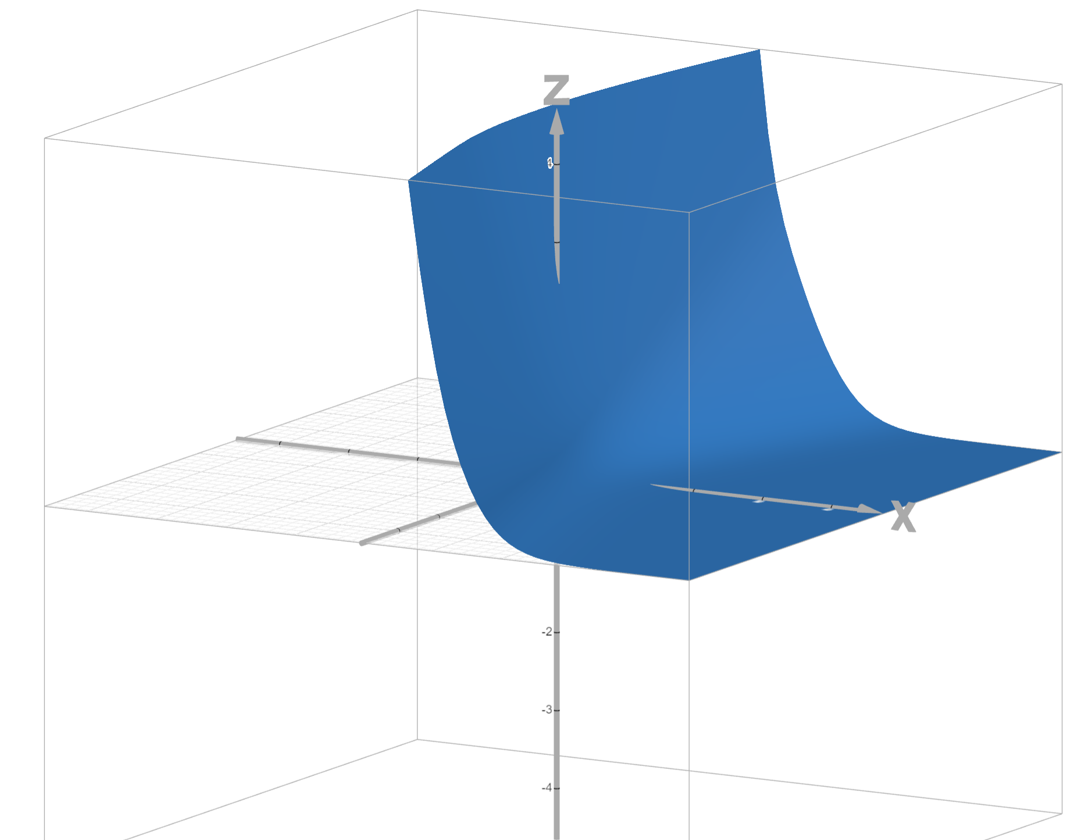